<a href="https://colab.research.google.com/github/DarkJans19/-Analisis-de-sistemas/blob/main/Workshop_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop No. 3

As you are becoming an expert on understand systems, it is the time to create an __expert system__.

Also, as you shoud know, you professor love movies a lot. So, you want to help him to choose next movies to watch. In this sense, you will take information for next movies from a popular website called ___IMDb___ where there is different information about movies and opinions.

However, you do not want to spend money to get movies information using a _webAPI_. But, as you are a good _computer engineer_, you know there is a technique called _web scrapping_, and you could get information using _HTML_ from an website, and put this information into a _DataFrame_ just to make easier data processing.

In this case, you are gonna use _request_ package to get HTML code from ___IMDb___ site, _beautiful soup_ package to make web scrapping, and _pandas_ to have a dataframe to handle data.

In [1]:
# neccesary libraries
!pip install --upgrade pip
!pip install requests
!pip install beautifulsoup4
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


## 1. Get Movies Data

In the link [IMDb Upcoming Relases](https://www.imdb.com/calendar/?ref_=rlm&region=US&type=MOVIE) there are next movies with some related data as genre or star actors. So, using html tags, you could take information and save it into python variables. At the end, here you want to have a DataFrame with movies information.

In [2]:
# import libraries
import requests
from bs4 import BeautifulSoup

def get_web_html(url: str) -> BeautifulSoup:
    """
    This method gets the HTML from a website using scrapping.

    Args:
        url: URL to scrape.

    Returns:
        A BeautifulSoup object with the HTML.
    """
    # headers to avoid 403 error, cos' IMDb blocks requests from bots
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    # get HTML and save it in a variable
    response = requests.get(url, headers=headers)
    return BeautifulSoup(response.text, "html.parser")


In [3]:
# import libraries
from bs4 import BeautifulSoup


def get_title_year(movie_data: BeautifulSoup) -> tuple:
    """
    This methog gets the title, year, and link of a movie data using scrapping.

    Args:
        movie_data: BeautifulSoup object with movie data.

    Returns:
        A tuple with title, year, and link.
    """
    # process main title of subdivission
    base_url = "https://www.imdb.com"
    ref_data = movie_data.find("a")
    title = ref_data.text.split("(")[0].strip()
    year = ref_data.text.split("(")[1].replace(")", "")
    link = base_url + ref_data["href"]
    return title, year, link


def get_genre_actors(movie_data: BeautifulSoup) -> list:
    """
    This method gets genre and actors from a movie data using scrapping.

    Args:
        movie_data: BeautifulSoup object with movie data.

    Returns:
        A list with genre and actors.
    """
    # process ul tags to get genre and actors
    data = []
    ul_tags = movie_data.find_all("ul")
    for ul_tag in ul_tags:
        temp = []
        for li_tag in ul_tag.find_all("li"):
            temp.append(li_tag.find("span").get_text())
        data.append(", ".join(temp))
    return data

In [4]:
# import libraries
from bs4 import BeautifulSoup
import pandas as pd


def generate_dataframe(url: str) -> pd.DataFrame:
    """
    This method generates a DataFrame with movie data from IMDb.

    Args:
        url: URL to scrape.

    Returns:
        A DataFrame with movie data.
    """
    # movies datastructure definition
    imdb = get_web_html(url)
    movies = []
    movies_metadata = ["Title", "Year", "Genre", "Actors"]

    # process HTML using scrapping going to each division with the class ipc-metadata-list-summary-item__tc
    movies_html = imdb.find_all("div", class_="ipc-metadata-list-summary-item__tc")
    for movie in movies_html:
        # get each movie data into a clean html structure
        movie_data = BeautifulSoup(str(movie), "html.parser")

        # get movie data
        title, year, link = get_title_year(movie_data)
        data = get_genre_actors(movie_data)

        # create a dictionary to have a nice data movie structure
        movie_clean_data = {
            "Title": title,
            "Year": year,
            "Genre": data[0],
            "Actors": data[1] if len(data) > 1 else "",
        }
        # create a list of dictionaries to create a DataFrame
        movies.append(movie_clean_data)

    # create movies dataframe
    return pd.DataFrame(movies, columns=movies_metadata)

# ================================ MAIN =================================== #
# url to scrape
url = "https://www.imdb.com/calendar/?ref_=rlm&region=US&type=MOVIE"
movies_df = generate_dataframe(url)
print(movies_df.head(3))


                     Title  Year                         Genre  \
0  Furiosa: A Mad Max Saga  2024     Action, Adventure, Sci-Fi   
1       The Garfield Movie  2024  Animation, Adventure, Comedy   
2                    Sight  2023     Biography, Drama, History   

                                              Actors  
0  Anya Taylor-Joy, Chris Hemsworth, Tom Burke, A...  
1  Chris Pratt, Samuel L. Jackson, Hannah Wadding...  
2  Terry Chen, Greg Kinnear, Natasha Mumba, Fionn...  


## 2. Time to build a Decision Tree

In order to create an expert system, you must define a decision tree. It means, a sequence of conditionals in order to get a result, it is like to build a flowchart composed for a lot of conditionals.

In this part, you must to go to any site like _draw.io_ and create a __flowchart__ about how you think is the best decision process: _what questions do you want to make?_

Remember, make the right questions is a pretty important step at any taks you want to do.

As follows is the algorithm used in the ___expert system___ (replace image called _expert\_system.png_):

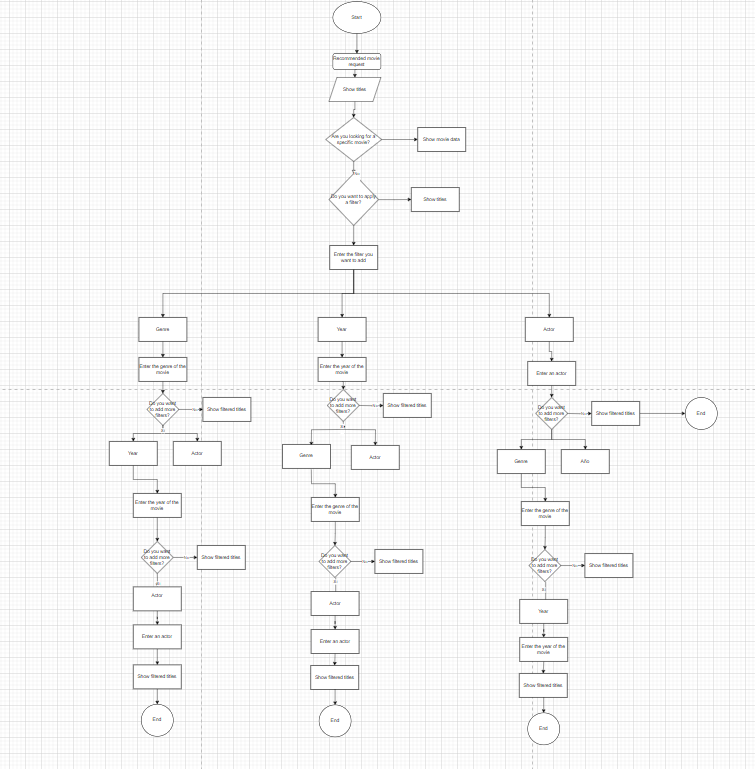![Expert System](expert_system.png)


### 2.1 Your proposal

_In this section you must write your system analysis, and justify the questions selection and order. Also, define system components, system sensibility, anything you consider important to solve this problem._

## 3. Put your expert system at work

Now it is the time to write code in order to create your first and __classical expert system__. Here it is important to use conditionals, and based on conditionals apply filters in _pandas dataframe_.

![Classical AI](classical_ai.jpg)

In [ ]:
# HERE write your code

***

# Some Useful Examples

I know you are learning about _python_, _coding_, and this technologies. As follows there are some simple examples about how you can use filtering in _pandas_.

In [5]:
# filter by an exact value
filtered_movies_df = movies_df[movies_df['Year'] == '2023']
print(filtered_movies_df.head(3))

                                         Title  Year  \
2                                        Sight  2023   
3  Kidnapped: The Abduction of Edgardo Mortara  2023   
8                                         Ezra  2023   

                       Genre  \
2  Biography, Drama, History   
3             Drama, History   
8              Comedy, Drama   

                                              Actors  
2  Terry Chen, Greg Kinnear, Natasha Mumba, Fionn...  
3  Paolo Pierobon, Fausto Russo Alesi, Barbara Ro...  
8  Robert De Niro, Vera Farmiga, Tony Goldwyn, Ro...  


In [8]:
# filter by a string option
filtered_movies_df = movies_df[movies_df['Genre'].str.contains('Thriller', na=False)]
print(filtered_movies_df.head(50))

                                              Title  Year  \
6                                     Terra Infirma  2024   
7                               In a Violent Nature  2024   
11                                             1992  2024   
24                                          Latency  2024   
32                                     The Exorcism  2024   
38                                            Midas  2024   
46                                         Boneyard  2024   
48                                         Longlegs  2024   
52                                           Lumina  2024   
54                                         Twisters  2024   
61                                           Cuckoo  2024   
66                                    Experiment 77  2024   
74                                           Stream  2024   
78                                        Slingshot  2024   
79                                  Strange Darling  2023   
83                      